## Applied

### 8

1. This question involves the use of simple linear regression on the Auto data set.
    1. Use the `lm()` function to perform a simple linear regression with `mpg` as the response and `horsepower` as the predictor. Use the `summary()` function to print the results. Comment on the output.
    
     For example:
     
        1. Is there a relationship between the predictor and the response?
        1. How strong is the relationship between the predictor and the response?
        1. Is the relationship between the predictor and the response positive or negative?
        1. What is the predicted mpg associated with a horsepower of 98? What are the associated 95 % confidence and prediction intervals?
        
    1. Plot the response and the predictor. Use the abline() function to display the least squares regression line.
    1. Use the plot() function to produce diagnostic plots of the least squares regression fit. Comment on any problems you see with the fit.

#### Answers

##### a)

In [37]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

PATH = './data/'
auto = pd.read_csv(f'{PATH}Auto.csv',sep=',')
auto.loc[auto['horsepower'] == '?','horsepower'] = np.nan
auto['horsepower'] = auto['horsepower'].astype(float)
auto.dropna(inplace=True)
auto.reset_index(inplace=True,drop=True)

In [38]:
y = auto['mpg']
X = auto['horsepower']
X = sm.add_constant(X)

mod = sm.OLS(y,X).fit()
mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Sat, 13 Oct 2018   Prob (F-statistic):           7.03e-81
Time:                        16:18:14   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         39.9359      0.717     55.660      0.000      38.525      41.347
horsepower    -0.1578      0.006    -24.489      0.000      -0.171      -0.145
==============================================================================
Omnibus:                       16.432   Durbin-Watson:                   0.920
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.305
Skew:                           0.492   Prob(JB):                     0.000175
Kurtosis:                       3.299   Cond. No.                         322.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

There is a strong negative relationship between the predictor and the response. The p-value is close to 0.

In [39]:
x = np.array([98])
x = sm.add_constant(x, has_constant='add')
mod.predict(x)

array([24.46707715])

##### b)

In [40]:
%matplotlib inline
import matplotlib.pyplot as plt

##### b)

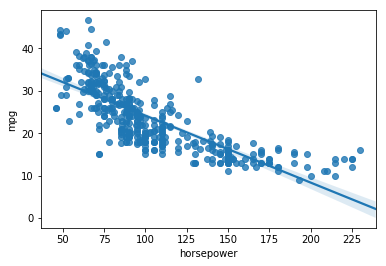

In [41]:
sns.regplot(x='horsepower', y='mpg', data=auto)

##### c)

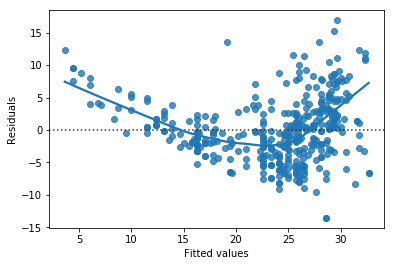

In [42]:
ax = sns.residplot(x=mod.fittedvalues, y=y, lowess=True)
ax.set(xlabel='Fitted values',ylabel='Residuals')
plt.show()

There is a strong pattern in the data which indicates a non-linearity. The fit should include a quadratic transformation.

### 9

1. This question involves the use of multiple linear regression on the Auto data set. 
    1. Produce a scatterplot matrix which includes all of the variables in the data set.
    1. Compute the matrix of correlations between the variables using the function cor(). You will need to exclude the name variable, which is qualitative.
    1. Use the lm() function to perform a multiple linear regression with mpg as the response and all other variables except name as thepredictors. Use the summary() function to print the results. Comment on the output. For instance:
        1. Is there a relationship between the predictors and the response?
        1. Which predictors appear to have a statistically significant relationship to the response?
        1. What does the coefficient for the year variable suggest?
    1. Use the plot() function to produce diagnostic plots of the linear regression fit. Comment on any problems you see with the fit. Do the residual plots suggest any unusually large outliers? Does the leverage plot identify any observations with unusually high leverage?
    1. Use the * and : symbols to fit linear regression models with interaction effects. Do any interactions appear to be statistically significant?
    1. Try a few different transformations of the variables, such as log(X),√X,X^2. Comment on your findings.

#### Answers

##### a)

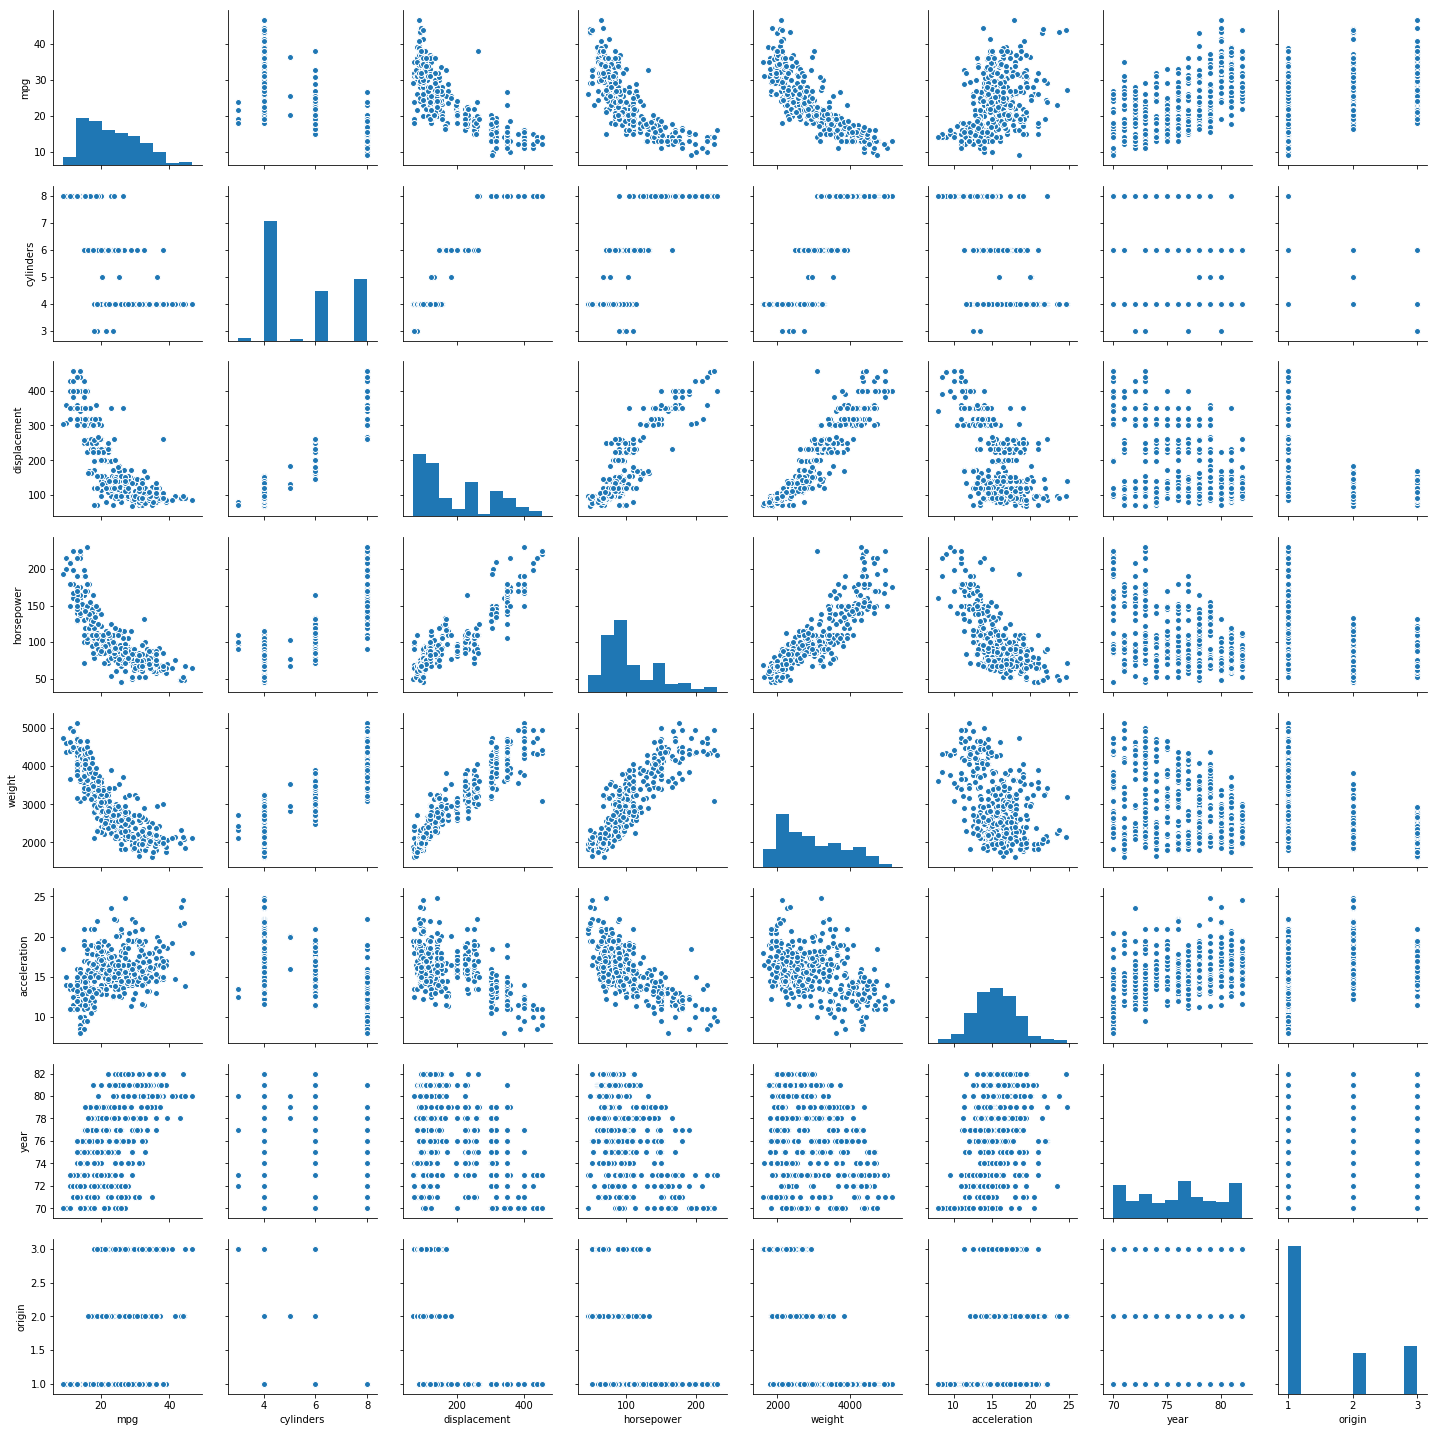

In [43]:
sns.pairplot(auto)

##### b)

In [44]:
auto.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


In [45]:
y = auto['mpg']

In [46]:
X = auto.drop(['mpg','name'], axis=1)
X = sm.add_constant(X)

In [47]:
mod = sm.OLS(y, X).fit()

In [48]:
mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4
Date:                Sat, 13 Oct 2018   Prob (F-statistic):          2.04e-139
Time:                        16:18:30   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -17.2184      4.644     -3.707      0.000     -26.350      -8.087
cylinders       -0.4934      0.323     -1.526      0.128      -1.129       0.142
displacement     0.0199      0.008      2.647      0.008       0.005       0.035
horsepower      -0.0170      0.014     -1.230      0.220      -0.044       0.010
weight          -0.0065      0.001     -9.929      0.000      -0.008      -0.005
acceleration     0.0806      0.099      0.815      0.415      -0.114       0.275
year             0.7508      0.051     14.729      0.000       0.651       0.851
origin           1.4261      0.278      5.127      0.000       0.879       1.973
==============================================================================
Omnibus:                       31.906   Durbin-Watson:                   1.309
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.100
Skew:                           0.529   Prob(JB):                     2.95e-12
Kurtosis:                       4.460   Cond. No.                     8.59e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.59e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The F-statistic is very low - this indicates a relationship between the predictors and the response.  
Significant predictors are: _displacement, weight, year, origin_.  
The coefficient of the _year_ variable suggests a higher _mpg_ for younger cars.

##### d)

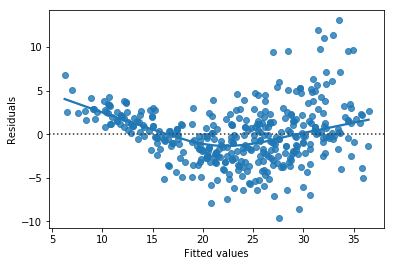

In [51]:
ax = sns.residplot(mod.fittedvalues,y,lowess=True)
ax.set(xlabel='Fitted values', ylabel='Residuals')
plt.show()

There is a non linear relationship between the predictors and the response. _TODO_ Add more plots.

##### e)

In [52]:
import statsmodels.formula.api as smf

In [60]:
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [69]:
mod = smf.ols("mpg ~ C(cylinders) + displacement * horsepower + weight + acceleration + year + C(origin)", data=auto).fit()
mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.871
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     214.0
Date:                Tue, 16 Oct 2018   Prob (F-statistic):          1.85e-160
Time:                        22:13:08   Log-Likelihood:                -959.23
No. Observations:                 392   AIC:                             1944.
Df Residuals:                     379   BIC:                             1996.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  -6.1550      4.571     -1.347      0.179     -15.142       2.832
C(cylinders)[T.4]           6.8586      1.518      4.518      0.000       3.874       9.844
C(cylinders)[T.5]           8.0807      2.313      3.494      0.001       3.533      12.628
C(cylinders)[T.6]           6.7977      1.723      3.945      0.000       3.410      10.186
C(cylinders)[T.8]           8.5930      1.979      4.342      0.000       4.702      12.484
C(origin)[T.2]              0.7287      0.521      1.400      0.162      -0.295       1.752
C(origin)[T.3]              1.6098      0.498      3.231      0.001       0.630       2.590
displacement               -0.0647      0.012     -5.458      0.000      -0.088      -0.041
horsepower                 -0.1791      0.021     -8.578      0.000      -0.220      -0.138
displacement:horsepower     0.0005   5.35e-05      8.488      0.000       0.000       0.001
weight                     -0.0031      0.001     -4.643      0.000      -0.004      -0.002
acceleration               -0.2257      0.090     -2.497      0.013      -0.403      -0.048
year                        0.7237      0.045     16.107      0.000       0.635       0.812
==============================================================================
Omnibus:                       62.594   Durbin-Watson:                   1.479
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              138.045
Skew:                           0.831   Prob(JB):                     1.06e-30
Kurtosis:                       5.385   Cond. No.                     1.04e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.04e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The_ displacement * horsepower_ interaction seems to be statistically significant.

##### f)

In [80]:
mod = smf.ols("mpg ~ np.log(horsepower)", data=auto).fit()
mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.668
Model:                            OLS   Adj. R-squared:                  0.667
Method:                 Least Squares   F-statistic:                     785.9
Date:                Tue, 16 Oct 2018   Prob (F-statistic):           1.70e-95
Time:                        22:17:49   Log-Likelihood:                -1144.9
No. Observations:                 392   AIC:                             2294.
Df Residuals:                     390   BIC:                             2302.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept            108.6997      3.050     35.644      0.000     102.704     114.695
np.log(horsepower)   -18.5822      0.663    -28.034      0.000     -19.885     -17.279
==============================================================================
Omnibus:                       11.919   Durbin-Watson:                   1.031
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               15.557
Skew:                           0.278   Prob(JB):                     0.000419
Kurtosis:                       3.803   Cond. No.                         64.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Using the _log_ of horsepower produces a higher R-squared than using horsepower directly.

### 10

1. This question should be answered using the Carseats data set.
    1. Fit a multiple regression model to predict _Sales_ using _Price, Urban, and US._
    1. Provide an interpretation of each coefficient in the model. Be careful - some of the variables in the model are qualitative!
    1. Write out the model in equation form, being careful to handle the qualitative variables properly.
    1. For which of the predictors can you reject the null hypothesis $H_0 : \beta_j = 0$?
    1. On the basis of your response to the previous question, fit a smaller model that only uses the predictors for which there is evidence of association with the outcome.  
    1. How well do the models in (a) and (e) fit the data?
    1. Using the model from (e), obtain 95 % confidence intervals for the coefficient(s).
    1. Is there evidence of outliers or high leverage observations in the model from (e)?


### 11

1. In this problem we will investigate the t-statistic for the null hypoth- esis H 0 : β = 0 in simple linear regression without an intercept. To begin, we generate a predictor x and a response y as follows.

     ```set . seed (1)
     x = rnorm (100)
     y =2* x + rnorm (100)```
    1.  Perform a simple linear regression of y onto x , without an in- tercept. Report the coefficient estimate β̂, the standard error of this coefficient estimate, and the t-statistic and p-value associ- ated with the null hypothesis H 0 : β = 0. Comment on these results. (You can perform regression without an intercept using the command lm(y∼x+0) .) 
    1. Now perform a simple linear regression of x onto y without an intercept, and report the coefficient estimate, its standard error, and the corresponding t-statistic and p-values associated with the null hypothesis H 0 : β = 0. Comment on these results.  
    1.  What is the relationship between the results obtained in (a) and (b)?
    1. For the regression of Y onto X without an intercept, the t- statistic for H 0 : β = 0 takes the form β̂/SE( β̂), where β̂ is given by (3.38), and where
     (These formulas are slightly different from those given in Sec- tions 3.1.1 and 3.1.2, since here we are performing regression without an intercept.) Show algebraically, and confirm numeri- cally in R , that the t-statistic can be written as
    1. Using the results from (d), argue that the t-statistic for the re- gression of y onto x is the same as the t-statistic for the regression of x onto y .
    1. In R , show that when regression is performed with an intercept, the t-statistic for H 0 : β 1 = 0 is the same for the regression of y onto x as it is for the regression of x onto y .


### 12

1. This problem involves simple linear regression without an intercept.
    1. Recall that the coefficient estimate β̂ for the linear regression of Y onto X without an intercept is given by (3.38). Under what circumstance is the coefficient estimate for the regression of X onto Y the same as the coefficient estimate for the regression of Y onto X?
    1. Generate an example in R with n = 100 observations in which the coefficient estimate for the regression of X onto Y is different from the coefficient estimate for the regression of Y onto X.
    1. Generate an example in R with n = 100 observations in which the coefficient estimate for the regression of X onto Y is the same as the coefficient estimate for the regression of Y onto X.
